## **Starting With Pytorch**

### ***Contents***
    -- Quickstart
    -- Tensors
    -- Datasets and DataLoaders
    -- Transforms
    -- Build Model
    -- Automatic Differentiation
    -- Optimization Loop
    -- Save, Load and Use Model

In [2]:
# Import Dependancy
import torch
import numpy as np
import os
import pandas as pd
from torchvision.io import read_image
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision.models as models
from torchvision.transforms import ToTensor, Lambda
from torch.utils.data import Dataset
import matplotlib.pyplot as plt

In [3]:
# # # # Quickstart
# # # Download training data from open datasets.
# training_data = datasets.FashionMNIST(
#     root="data",
#     train=True,
#     download=True,
#     transform=ToTensor(),
# )

# # # Download test data from open datasets.
# test_data = datasets.FashionMNIST(
#     root="data",
#     train=False,
#     download=True,
#     transform=ToTensor(),
# )

# batch_size = 64

# # # Create data loaders.
# train_dataloader = DataLoader(training_data, batch_size=batch_size)
# test_dataloader = DataLoader(test_data, batch_size=batch_size)

# for X, y in test_dataloader:
#     print(f"Shape of X [N, C, H, W]: {X.shape}")
#     print(f"Shape of y: {y.shape} {y.dtype}")
#     break

# # # Get cpu, gpu or mps device for training.
# device = (
#     "cuda"
#     if torch.cuda.is_available()
#     else "mps"
#     if torch.backends.mps.is_available()
#     else "cpu"
# )
# # print(f"Using {device} device")

# # # Define model
# class NeuralNetwork(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.flatten = nn.Flatten()
#         self.linear_relu_stack = nn.Sequential(
#             nn.Linear(28*28, 512),
#             nn.ReLU(),
#             nn.Linear(512, 512),
#             nn.ReLU(),
#             nn.Linear(512, 10)
#         )

#     def forward(self, x):
#         x = self.flatten(x)
#         logits = self.linear_relu_stack(x)
#         return logits

# model = NeuralNetwork().to(device)
# # print(model)

# # # To train a model, we need a loss function and an optimizer
# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

# ''' In a single training loop, the model makes predictions on the training dataset (fed to it in batches), 
# and backpropagates the prediction error to adjust the model’s parameters.'''
# def train(dataloader, model, loss_fn, optimizer):
#     size = len(dataloader.dataset)
#     model.train()
#     for batch, (X, y) in enumerate(dataloader):
#         X, y = X.to(device), y.to(device)

#         # Compute prediction error
#         pred = model(X)
#         loss = loss_fn(pred, y)

#         # Backpropagation
#         loss.backward()
#         optimizer.step()
#         optimizer.zero_grad()

#         if batch % 100 == 0:
#             loss, current = loss.item(), (batch + 1) * len(X)
#             print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


# # # We also check the model’s performance against the test dataset to ensure it is learning
# def test(dataloader, model, loss_fn):
#     size = len(dataloader.dataset)
#     num_batches = len(dataloader)
#     model.eval()
#     test_loss, correct = 0, 0
#     with torch.no_grad():
#         for X, y in dataloader:
#             X, y = X.to(device), y.to(device)
#             pred = model(X)
#             test_loss += loss_fn(pred, y).item()
#             correct += (pred.argmax(1) == y).type(torch.float).sum().item()
#     test_loss /= num_batches
#     correct /= size
#     print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


# epochs = 5
# for t in range(epochs):
#     print(f"Epoch {t+1}\n-------------------------------")
#     train(train_dataloader, model, loss_fn, optimizer)
#     test(test_dataloader, model, loss_fn)
# print("Done!")

# # # A common way to save a model is to serialize the internal state dictionary (containing the model parameters)
# torch.save(model.state_dict(), "model.pth")
# print("Saved PyTorch Model State to model.pth")

# # # The process for loading a model includes re-creating the model structure and loading the state dictionary into it
# model = NeuralNetwork().to(device)
# model.load_state_dict(torch.load("model.pth"))

# # # This model can now be used to make predictions
# classes = [
#     "T-shirt/top",
#     "Trouser",
#     "Pullover",
#     "Dress",
#     "Coat",
#     "Sandal",
#     "Shirt",
#     "Sneaker",
#     "Bag",
#     "Ankle boot",
# ]

# model.eval()
# x, y = test_data[0][0], test_data[0][1]
# with torch.no_grad():
#     x = x.to(device)
#     pred = model(x)
#     predicted, actual = classes[pred[0].argmax(0)], classes[y]
#     print(f'Predicted: "{predicted}", Actual: "{actual}"')

In [4]:
# # # Tensors
# # Initializing Tensor
# Directly from Data
data = [[1, 2, 3], [4, 5, 6]]
data_tensor = torch.tensor(data=data)
print(data_tensor)
print()

# From a Numpy Array
data_array = np.array(data)
data_tensor = torch.tensor(data=data_array)
print(data_tensor)
print()

# From another Tensor
x_ones = torch.ones_like(data_tensor) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(data_tensor, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")
print()

# With random or constant values
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")
print()


# # Attributes of a Tensor
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")


# # Operations on Tensors
# Standard numpy-like indexing and slicing
tensor = torch.ones(4, 4)
print(tensor)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print()

# Concatenation of tensor
cc_tensor = torch.cat([tensor, tensor, tensor], dim=1)
print(cc_tensor)
print()

# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(y1)
print(y1, '\n', y2, '\n', y3)
print(torch.matmul(tensor, tensor.T, out=y3))


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
print(z1, '\n', z2, '\n', z3)
print(torch.mul(tensor, tensor, out=z3))

# Single-element tensors If you have a one-element tensor, 
# for example by aggregating all values of a tensor into one value, 
# you can convert it to a Python numerical value using item()
agg = tensor.sum()
agg_item = agg.item()
print(agg_item)
print(type(agg_item))
print()

# In-place operations Operations that store the result into the operand are called in-place. 
# They are denoted by a _ suffix. For example: x.copy_(y), x.t_(), will change x.
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)


# # Bridge with Numpy
# - Tensor to numpy array
t = torch.ones(5)
print(f"tensor: {t}")
n = t.numpy()
print(f"numpy: {n}")
print()

# A change in the tensor reflects in the NumPy array.
t.add_(1)
print(f"tensor: {t}")
print(f"numpy: {n}")
print()

# - NumPy array to Tensor
n = np.ones(5)
t = torch.from_numpy(n)

# Changes in the NumPy array reflects in the tensor.
np.add(n, 1, out=n)
print(f"tensor: {t}")
print(f"numpy: {n}")

tensor([[1, 2, 3],
        [4, 5, 6]])

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)

Ones Tensor: 
 tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int32) 

Random Tensor: 
 tensor([[0.6490, 0.4440, 0.4333],
        [0.1494, 0.5867, 0.3212]]) 


Random Tensor: 
 tensor([[0.5950, 0.9027, 0.3143],
        [0.3571, 0.4829, 0.4253]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0

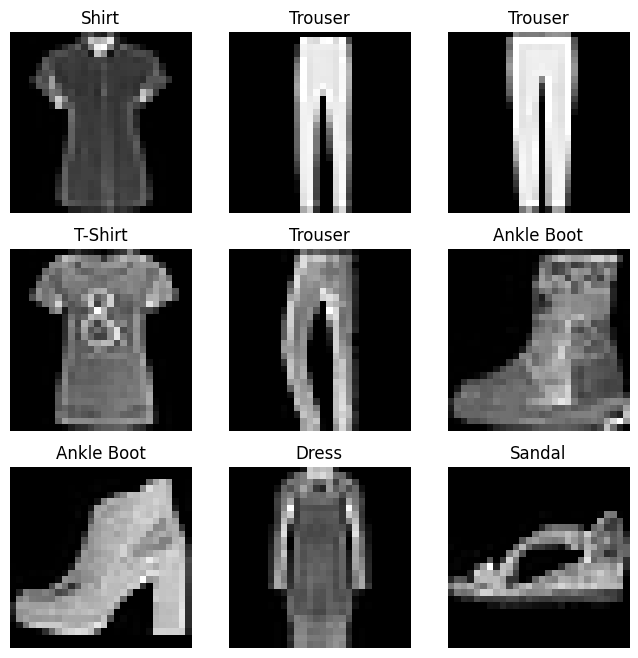

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


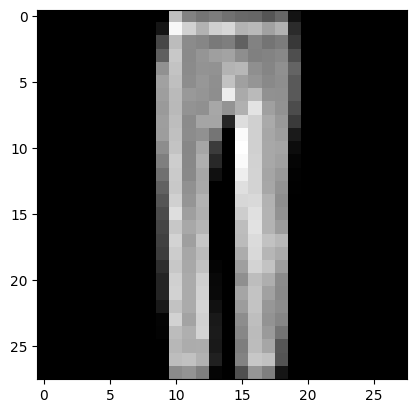

Label: 1


In [5]:
# # # DATASETS & DATALOADERS
# # Loading a Dataset
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# # Iterating and Visualizing the Dataset
# We can index Datasets manually like a list: training_data[index]. 
# We use matplotlib to visualize some samples in our training data.
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


# # Creating a Custom Dataset for your files
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
    

# # Preparing your data for training with DataLoaders
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)


# # Iterate through the DataLoader
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[8].squeeze()
label = train_labels[8]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [6]:
# # # TRANSFORMS
# -- ToTensor() = Scaling images ndarray in bw [0, 1]
# -- target_transform = Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))
ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [7]:
# # # BUILD THE NEURAL NETWORK (BUILD MODEL)
# # Define the Class
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()
print(model)


# # Calling the model on the input returns a 2-dimensional tensor with dim=0 corresponding to each output of 
# 10 raw predicted values for each class, and dim=1 corresponding to the individual values of each output. 
# We get the prediction probabilities by passing it through an instance of the nn.Softmax module.

X = torch.rand(1, 28, 28, device='cpu')
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")


# # Model Layers
# we will take a sample minibatch of 3 images of size 28x28 and see what happens to it as we pass it through the network
input_image = torch.rand(3,28,28)
print(input_image.size())

# nn.Flatten : To convert each 2D 28x28 image into a contiguous array of 784 pixel values
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

# nn.Linear : Applies a linear transformation on the input using its stored weights and biases
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

# nn.ReLU : Non-linear activations are what create the complex mappings between the model’s inputs and outputs. 
# They are applied after linear transformations to introduce nonlinearity, 
# helping neural networks learn a wide variety of phenomena
# We use nn.ReLU between our linear layers, but there’s other activations to introduce non-linearity in your model
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

# nn.Sequential : The data is passed through all the modules in the same order as defined. 
# You can use sequential containers to put together a quick network like seq_modules
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

# nn.Softmax : The last linear layer of the neural network returns logits - raw values in [-infty, infty] 
# - which are passed to the nn.Softmax module. The logits are scaled to values [0, 1] 
# representing the model’s predicted probabilities for each class. 
# dim parameter indicates the dimension along which the values must sum to 1.
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)


# # Model Paramenter
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
Predicted class: tensor([6])
torch.Size([3, 28, 28])
torch.Size([3, 784])
torch.Size([3, 20])
Before ReLU: tensor([[-0.0013,  0.5939,  0.3484,  0.0433,  0.1644, -0.7812,  0.0976, -0.0172,
         -0.0807, -0.4439,  0.2898,  0.1845, -0.3812,  0.0740,  0.0715, -0.0782,
          0.1610, -0.4853,  0.8222, -0.0563],
        [-0.2716,  0.3837,  0.1968, -0.2234,  0.0394, -0.4477,  0.0420,  0.2233,
         -0.1071,  0.0358,  0.2387,  0.1121, -0.4993, -0.1402, -0.0586, -0.2964,
          0.0286, -0.4458,  0.4757, -0.3163],
        [ 0.0919, -0.2232,  0.2870,  0.0848,  0.3143, -0.2424,  0.0918, -0.2521,
         -0.2389, -0.3347,  0.4161, -0.0072,  0.0656,  0.1224, -0.2029, -0.17

##### ***Tensors, Functions and Computational graph***
***This code defines the following computational graph:***

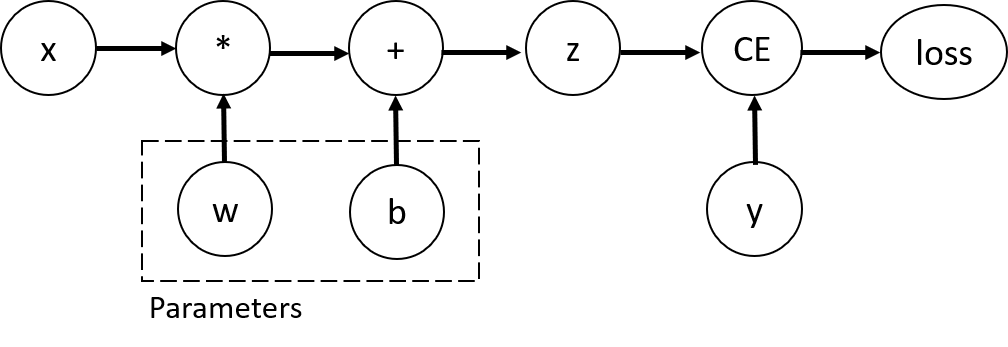

In [8]:
# # # AUTOMATIC DIFFERENTIATION WITH TORCH.AUTOGRAD
# -> When training neural networks, the most frequently used algorithm is back propagation. 
# In this algorithm, parameters (model weights) are adjusted according to the gradient of the 
# loss function with respect to the given parameter

# -> To compute those gradients, PyTorch has a built-in differentiation engine called torch.autograd. 
# It supports automatic computation of gradient for any computational graph.

# -> Consider the simplest one-layer neural network, with input x, parameters w and b, and some loss function. 
# It can be defined in PyTorch in the following manner:

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

# NOTE: 
# You can set the value of requires_grad when creating a tensor, or later by using x.requires_grad_(True) method.
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")


# # Computing Gradients
# To optimize weights of parameters in the neural network, we need to compute the derivatives of our loss function 
# with respect to parameters, namely, we need ∂loss/∂w and ​∂loss/∂b under some fixed values of x and y. 
# To compute those derivatives, we call loss.backward(), and then retrieve the values from w.grad and b.grad
loss.backward()
print(w.grad)
print(b.grad)

# # Disabling Gradient Tracking
# By default, all tensors with requires_grad=True are tracking their computational history and support gradient computation
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

# Another way to achieve the same result is to use the detach() method on the tensor:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)
# There are reasons you might want to disable gradient tracking:
# --> To mark some parameters in your neural network as frozen parameters.
# --> To speed up computations when you are only doing forward pass, because computations on 
# tensors that do not track gradients would be more efficient.

# # More on Computational Graphs
# In a forward pass, autograd does two things simultaneously:
# --> run the requested operation to compute a resulting tensor
# --> maintain the operation’s gradient function in the DAG.
# The backward pass kicks off when .backward() is called on the DAG root. autograd then:
# --> computes the gradients from each .grad_fn,
# --> accumulates them in the respective tensor’s .grad attribute
# --> using the chain rule, propagates all the way to the leaf tensors.

# NOTE
# DAGs are dynamic in PyTorch An important thing to note is that the graph is recreated from scratch; 
# after each .backward() call, autograd starts populating a new graph. 
# This is exactly what allows you to use control flow statements in your model; 
# you can change the shape, size and operations at every iteration if needed.

# # Optional Reading: Tensor Gradients and Jacobian Products
inp = torch.eye(4, 5, requires_grad=True)
out = (inp+1).pow(2).t()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"First call\n{inp.grad}")
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nSecond call\n{inp.grad}")
inp.grad.zero_()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nCall after zeroing gradients\n{inp.grad}")
# otice that when we call backward for the second time with the same argument, the value of the gradient is different. 
# This happens because when doing backward propagation, PyTorch accumulates the gradients.

Gradient function for z = <AddBackward0 object at 0x00000280BDA6BD30>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x00000280BDA6A4D0>
tensor([[0.0290, 0.2987, 0.0095],
        [0.0290, 0.2987, 0.0095],
        [0.0290, 0.2987, 0.0095],
        [0.0290, 0.2987, 0.0095],
        [0.0290, 0.2987, 0.0095]])
tensor([0.0290, 0.2987, 0.0095])
True
False
False
First call
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])

Second call
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.]])

Call after zeroing gradients
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])


In [9]:
# # # OPTIMIZING MODEL PARAMETERS
# # Hyperparameters
# We define the following hyperparameters for training:
# --> Number of Epochs - the number times to iterate over the dataset
# --> Batch Size - the number of data samples propagated through the network before the parameters are updated
# --> Learning Rate - how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed,
# while large values may result in unpredictable behavior during training.
learning_rate = 1e-3
batch_size = 64
epochs = 5

# # Optimization Loop
# Each epoch consists of two main parts:
# --> The Train Loop - iterate over the training dataset and try to converge to optimal parameters.
# --> The Validation/Test Loop - iterate over the test dataset to check if model performance is improving.

# # Loss Function
# Loss function measures the degree of dissimilarity of obtained result to the target value, and it is the loss function that we want to minimize during training.
# Common loss functions include nn.MSELoss (Mean Square Error) for regression tasks, and nn.NLLLoss (Negative Log Likelihood) for classification. 
# nn.CrossEntropyLoss combines nn.LogSoftmax and nn.NLLLoss.
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

# # Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# Inside the training loop, optimization happens in three steps:
# --> Call optimizer.zero_grad() to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, 
# we explicitly zero them at each iteration.
# --> Backpropagate the prediction loss with a call to loss.backward(). PyTorch deposits the gradients of the loss w.r.t. each parameter.
# --> Once we have our gradients, we call optimizer.step() to adjust the parameters by the gradients collected in the backward pass.

# # Full Implementation
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


# We initialize the loss function and optimizer, and pass it to train_loop and test_loop. 
# Feel free to increase the number of epochs to track the model’s improving performance.
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.290138  [   64/60000]
loss: 2.280046  [ 6464/60000]
loss: 2.273524  [12864/60000]
loss: 2.245908  [19264/60000]
loss: 2.231732  [25664/60000]
loss: 2.208504  [32064/60000]
loss: 2.196763  [38464/60000]
loss: 2.170135  [44864/60000]
loss: 2.156797  [51264/60000]
loss: 2.154456  [57664/60000]
Test Error: 
 Accuracy: 48.9%, Avg loss: 2.131743 

Epoch 2
-------------------------------
loss: 2.104286  [   64/60000]
loss: 2.103673  [ 6464/60000]
loss: 2.076112  [12864/60000]
loss: 2.037796  [19264/60000]
loss: 2.018621  [25664/60000]
loss: 1.973718  [32064/60000]
loss: 1.962444  [38464/60000]
loss: 1.926766  [44864/60000]
loss: 1.862717  [51264/60000]
loss: 1.815990  [57664/60000]
Test Error: 
 Accuracy: 57.0%, Avg loss: 1.836080 

Epoch 3
-------------------------------
loss: 1.837403  [   64/60000]
loss: 1.797598  [ 6464/60000]
loss: 1.800921  [12864/60000]
loss: 1.748123  [19264/60000]
loss: 1.723928  [25664/60000]
loss: 1.673104  [32064/600

In [10]:
# # # SAVE AND LOAD THE MODEL
# # Saving and Loading Model Weights
# PyTorch models store the learned parameters in an internal state dictionary, called state_dict. 
# These can be persisted via the torch.save method:
model = models.vgg16(weights='IMAGENET1K_V1')
torch.save(model.state_dict(), 'model_weights.pth')

# To load model weights, you need to create an instance of the same model first, 
# and then load the parameters using load_state_dict() method.
model = models.vgg16() # we do not specify ``weights``, i.e. create untrained model
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

# # Saving and Loading Models with Shapes
# -> Save Model
torch.save(model, 'model.pth')
# -> Load Model
model = torch.load('model.pth')

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\techn/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100.0%


KeyboardInterrupt: 